# Pharmacokinetic parameters
Pharmacokinetic parameters are numerical values that describe how a drug behaves in the body. They play a vital role in determining the dosage and frequency of drug administration. Here's a summary of some of the key parameters:

1. **Absorption**: This parameter involves how the drug is absorbed into the bloodstream from the site of administration. The rate and extent of absorption can influence the onset, intensity, and duration of a drug's effect.

2. **Distribution**: This refers to how the drug spreads throughout the body. The volume of distribution (Vd) is a key parameter that quantifies the extent to which a drug is distributed in the body's tissues compared to its concentration in the blood.

3. **Metabolism (Biotransformation)**: Metabolism is how the drug is chemically modified or broken down in the body, primarily by liver enzymes. This can change the drug's activity and affects how quickly it's cleared from the body.

4. **Elimination (Excretion)**: This parameter refers to the removal of the drug from the body, primarily through the kidneys (urine) or liver (bile). The rate of elimination is usually expressed as the drug's half-life (t1/2), which is the time it takes for the concentration of the drug in the body to be reduced by half.

5. **Clearance (Cl)**: This is a measure of the body's efficiency in eliminating the drug, expressed as volume/time (like mL/min). It's a crucial parameter that determines the steady-state concentration of the drug for a given dosage regimen.

6. **Bioavailability (F)**: This is the fraction of the administered dose of a drug that reaches the systemic circulation in an unchanged form. It's a crucial parameter, especially for oral medications.

7. **Area Under the Curve (AUC)**: This is a measure of the total exposure of the body to the drug. It's calculated as the integral of the concentration-time curve, from administration to elimination.

8. **Peak Concentration (Cmax) and Time to Reach Peak Concentration (Tmax)**: Cmax is the highest concentration a drug achieves in the body after administration, and Tmax is the time it takes to reach this peak concentration.

These pharmacokinetic parameters are essential in understanding a drug's behavior and in designing optimal drug dosing regimens. By understanding these parameters, healthcare professionals can better predict how a drug will behave, enabling them to administer the drug safely and effectively.

# Algebraic equation
We calculate the pharmacokinetic parameters based on simple algebraic equation for oral absorption:

\begin{equation}
C(t) = \frac{Dose}{V} \cdot t \cdot e^{-\frac{CL}{V}\cdot t}
\end{equation}

This model states the relationship between the independent variable, `time (t)`, and the dependent variable, concentration (`C`). The notation `C(t)` suggests that `C` depends on `t`. Dose, clearance (CL), and distribution volume (V) are param- eters (constants); they do not change with different values of t. 


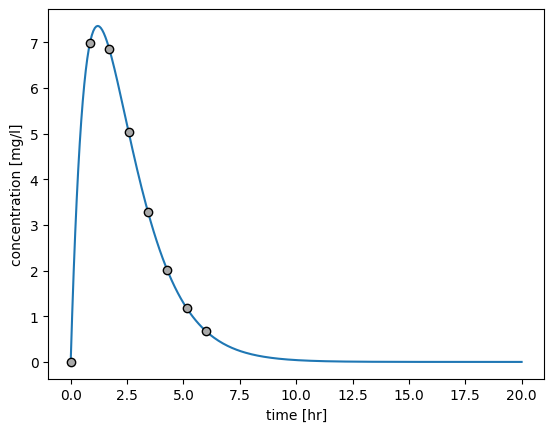

In [1]:
import numpy as np
from matplotlib import pyplot as plt

t = np.linspace(0, 20, num=300) # [hr]
t_points = np.linspace(0, 6, num=8)
Dose = 100  # [mg]
V = 6.0  # [l] 
CL = 5.0  # [L/hr]
C = Dose/V * t * np.exp(-CL/V*t)  # [mg/l]
C_points = Dose/V * t_points * np.exp(-CL/V*t_points)

f, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(t, C)
ax.plot(t_points, C_points, linestyle="None", marker="o", markeredgecolor="black", color="darkgrey")
ax.set_xlabel("time [hr]")
ax.set_ylabel("concentration [mg/l]")
plt.show()